# Анализ продаж и поведения клиентов в Olist
## Цель анализа

Целью данного проекта является анализ продаж и поведения клиентов интернет-магазина Olist с целью:
- выявить самые прибыльные категории товаров;
- проанализировать динамику выручки;
- понять, какие пользователи совершают повторные заказы;
- сформировать рекомендации по увеличению выручки и удержанию клиентов.


## Загрузка и EDA <a id="recs"></a>
В анализе используются данные о заказах, клиентах и товарах маркетплейса Olist.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns 
import plotly.graph_objs as go




df = pd.read_csv("processed_data.csv", parse_dates = ["order_purchase_timestamp",
        "order_approved_at",
        "order_delivered_carrier_date",
        "order_delivered_customer_date",
        "order_estimated_delivery_date"])


In [2]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_items,total_price,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,revenue,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,29.99,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,38.71,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,118.70,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,141.46,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,159.90,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,179.12,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,45.00,...,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,72.20,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,19.90,...,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery,28.62,2018-02


In [3]:
df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
total_items                             float64
total_price                             float64
total_freight                           float64
total_payment                           float64
num_payments                            float64
review_score                            float64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
product_id                               object
price                                   float64
freight_value                           

In [4]:
df["order_delivered_customer_date"].dt.year.value_counts().sort_index()

order_delivered_customer_date
2016.0      323
2017.0    46803
2018.0    63070
Name: count, dtype: int64

In [5]:
df["order_delivered_customer_date"].dt.month.value_counts().sort_index()

order_delivered_customer_date
1.0      7745
2.0      8188
3.0     10672
4.0     11071
5.0     12367
6.0     11527
7.0     10514
8.0     14285
9.0      4555
10.0     5463
11.0     5486
12.0     8323
Name: count, dtype: int64

In [6]:
full_range = pd.period_range(start = df["order_delivered_customer_date"].min(), end =  df["order_delivered_customer_date"].max(), 
                            freq = 'M')

In [7]:
orders_full = (df['order_delivered_customer_date'].dt.to_period('M')
               .value_counts()
               .reindex(full_range, fill_value=0)
               .sort_index())

In [8]:
orders_full

2016-10     245
2016-11      74
2016-12       4
2017-01     326
2017-02    1565
2017-03    2724
2017-04    2072
2017-05    4201
2017-06    3640
2017-07    3933
2017-08    4900
2017-09    4496
2017-10    5215
2017-11    5412
2017-12    8319
2018-01    7419
2018-02    6623
2018-03    7948
2018-04    8999
2018-05    8166
2018-06    7887
2018-07    6581
2018-08    9385
2018-09      59
2018-10       3
Freq: M, Name: count, dtype: int64

In [9]:
df["order_status"].value_counts()

order_status
delivered      110197
shipped          1186
canceled          706
unavailable       610
invoiced          361
processing        357
created             5
approved            3
Name: count, dtype: int64

In [10]:
df["revenue"].sum().round(2)

np.float64(20304557.35)

In [11]:
df['revenue'].isna().mean()


np.float64(0.006832708838439497)

In [12]:
df["order_delivered_customer_date"].isna().mean()

np.float64(0.02846815076041437)

In [13]:
df = df.dropna(subset = "revenue")

In [14]:
df["revenue"].isna().mean()

np.float64(0.0)

Text(0.5, 0, 'order by month')

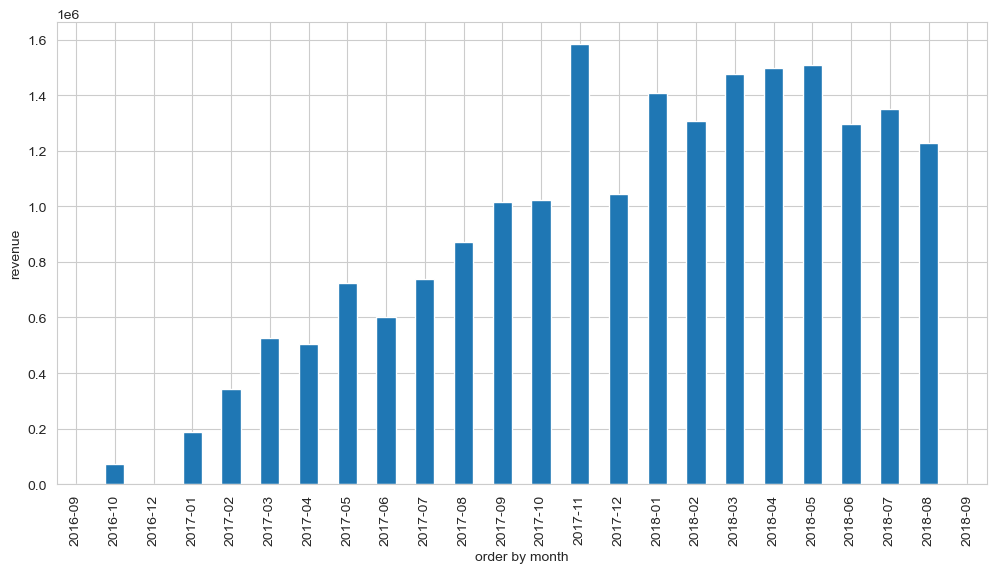

In [15]:
plt.figure(figsize = (12,6))
sns.set_style("whitegrid")
ax = df.groupby("order_month")["revenue"].sum().plot(kind="bar")
ax.set_ylabel("revenue")
ax.set_xlabel("order by month")

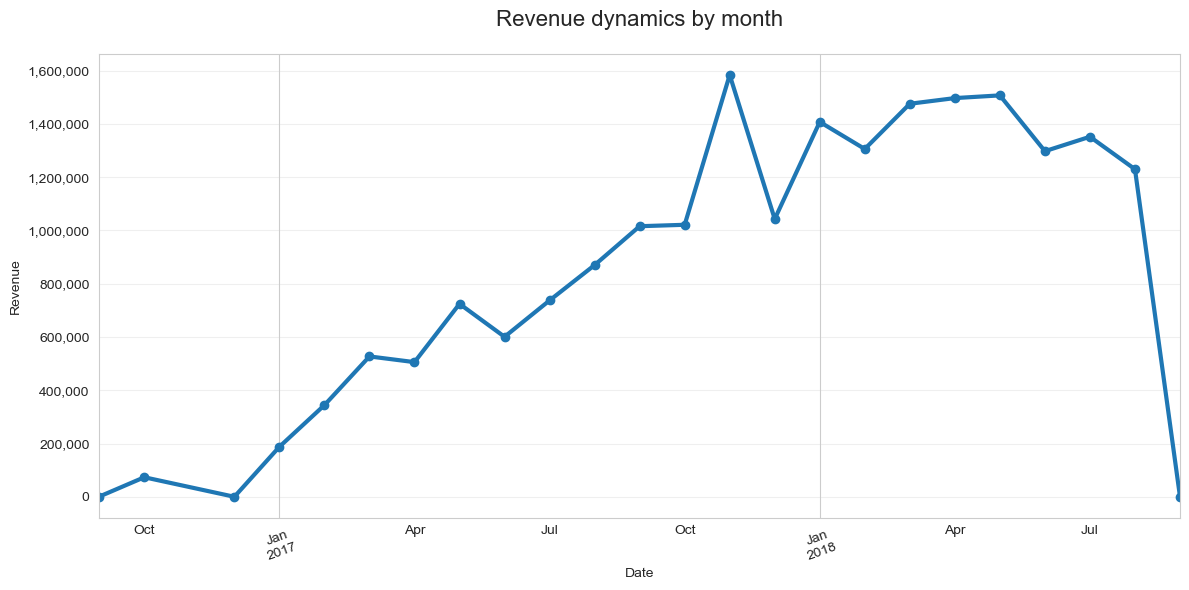

In [81]:
import matplotlib.ticker

plt.figure(figsize = (12,6))
sns.set_style("whitegrid")
df.groupby('order_month')['revenue'].sum().plot(figsize=(12,6), marker='o', linewidth=3)

plt.title('Revenue dynamics by month', fontsize=16, pad=20)
plt.ylabel('Revenue')
plt.xlabel('Date')

plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
    
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation = 20)
plt.tight_layout()
plt.show()

## Топ-категории <a id="recs"></a>

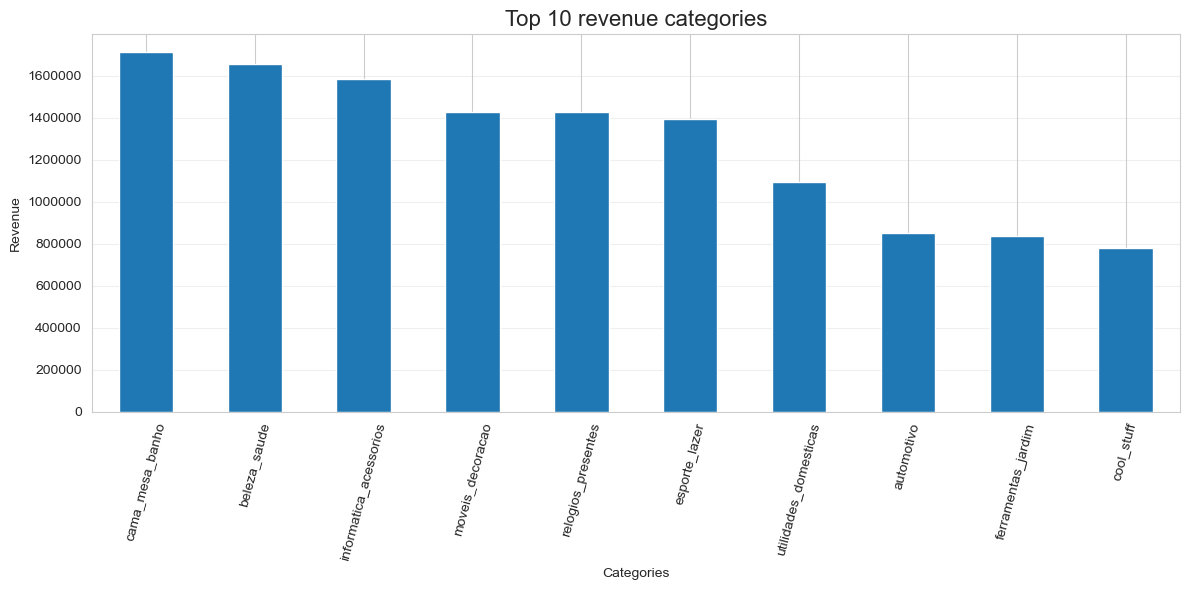

In [80]:
plt.figure(figsize = (12,6))
sns.set_style("whitegrid")
df.groupby("product_category_name")["revenue"].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title("Top 10 revenue categories", fontsize = 16)
plt.ylabel("Revenue")
plt.xlabel("Categories")

plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{int(x)}')
)

plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation = 75)
plt.tight_layout()
plt.show()

In [18]:
df["order_status"].value_counts()

order_status
delivered      110197
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: count, dtype: int64

In [19]:
df.groupby('order_month').size().reset_index(name='num_orders')

,order_month,num_orders
0,2016-09,6
1,2016-10,363
2,2016-12,1
3,2017-01,955
4,2017-02,1951
5,2017-03,3000
6,2017-04,2684
7,2017-05,4136
8,2017-06,3583
9,2017-07,4519


In [20]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'total_items', 'total_price', 'total_freight', 'total_payment',
       'num_payments', 'review_score', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_id', 'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'revenue', 'order_month'],
      dtype='object')

In [21]:
df['customer_id'].shape

(112650,)

In [22]:
#Количество уникальных пользователй 
df['customer_id'].nunique()

98666

## Повторные заказы и RFM <a id="recs"></a>

In [23]:
#Подсчет количество заказов на каждого клиента 

In [24]:
orders_per_customer = (
    df.groupby('customer_unique_id')['order_id']
      .nunique()
      .reset_index(name='orders_count')
)

In [25]:
orders_per_customer['customer_type'] = orders_per_customer['orders_count'].apply(
    lambda x: 'repeat' if x >= 2 else 'one_time'
)

In [26]:
orders_per_customer['orders_count'].value_counts()

orders_count
1     92507
2      2673
3       192
4        29
5         9
6         5
7         3
9         1
16        1
Name: count, dtype: int64

In [27]:
#Подсчет доли повторных заказов

In [28]:
round((orders_per_customer[orders_per_customer["customer_type"] == "repeat"].size) / orders_per_customer.size, 2)

0.03

In [29]:
orders_per_customer.head()

,customer_unique_id,orders_count,customer_type
0,0000366f3b9a7992bf8c76cfdf3221e2,1,one_time
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,one_time
2,0000f46a3911fa3c0805444483337064,1,one_time
3,0000f6ccb0745a6a4b88665a16c9f078,1,one_time
4,0004aac84e0df4da2b147fca70cf8255,1,one_time


In [30]:
one_time_users = orders_per_customer.loc[orders_per_customer["customer_type"] == "one_time", "customer_unique_id"]

In [31]:
one_time_users

0        0000366f3b9a7992bf8c76cfdf3221e2
1        0000b849f77a49e4a4ce2b2a4ca5be3f
2        0000f46a3911fa3c0805444483337064
3        0000f6ccb0745a6a4b88665a16c9f078
4        0004aac84e0df4da2b147fca70cf8255
                       ...               
95415    fffcf5a5ff07b0908bd4e2dbc735a684
95416    fffea47cd6d3cc0a88bd621562a9d061
95417    ffff371b4d645b6ecea244b27531430a
95418    ffff5962728ec6157033ef9805bacc48
95419    ffffd2657e2aad2907e67c3e9daecbeb
Name: customer_unique_id, Length: 92507, dtype: object

In [32]:
repeat_users = orders_per_customer.loc[orders_per_customer["customer_type"] == "repeat", "customer_unique_id"]

In [33]:
repeat_users

106      004288347e5e88a27ded2bb23747066c
123      004b45ec5c64187465168251cd1c9c2f
143      0058f300f57d7b93c477a131a59b36c3
246      00a39521eb40f7012db50455bf083460
309      00cc12a6d8b578b8ebd21ea4e2ae8b27
                       ...               
95083    ff22e30958c13ffe219db7d711e8f564
95135    ff44401d0d8f5b9c54a47374eb48c1b8
95241    ff8892f7c26aa0446da53d01b18df463
95259    ff922bdd6bafcdf99cb90d7f39cea5b3
95374    ffe254cc039740e17dd15a5305035928
Name: customer_unique_id, Length: 2913, dtype: object

In [34]:
users_rep_revenue = df[df["customer_unique_id"].isin(repeat_users)]["revenue"].sum()

In [35]:
users_rep_revenue

np.float64(1321843.96)

In [36]:
one_time_revenue = df[df["customer_unique_id"].isin(one_time_users)]["revenue"].sum()

In [37]:
repeat_new_time_df = pd.DataFrame(
    {
        'size_users_by_time': [repeat_users.size, one_time_users.size],
        'revenue_by_type_users': [users_rep_revenue, one_time_revenue]
    }, 
    index = ['repeat_users', 'one_time_users']
)


In [38]:
repeat_new_time_df

,size_users_by_time,revenue_by_type_users
repeat_users,2913,1321843.96
one_time_users,92507,18982713.39


In [39]:
customer_orders = df.groupby('customer_unique_id').agg(
    order_count = ('order_id', 'nunique'),
    total_revenue = ('revenue', 'sum')
)
repeat_customer = customer_orders[customer_orders["order_count"] > 1 ]
repeat_pct =  (len(repeat_customer) / len(customer_orders)) * 100
repeat_revenue_share = (repeat_customer['total_revenue'].sum() / df['revenue'].sum()) * 100
print(f"Repeat customers: {repeat_pct:.2f}% ({len(repeat_customer)} clients), Revenue share: {repeat_revenue_share:.2f}")

Repeat customers: 3.05% (2913 clients), Revenue share: 6.51


In [40]:
retention_by_state = df.groupby('customer_state').apply(
    lambda x: (x['customer_unique_id'].duplicated().sum() / x['customer_unique_id'].nunique()) * 100, include_groups = False
).sort_values(ascending = False)
print(retention_by_state.head(10))

customer_state
AP    22.388060
MT    20.847652
GO    20.133883
AC    19.480519
MS    19.040698
SC    18.872758
RS    18.784530
SP    18.678872
PR    18.595041
RJ    18.499553
dtype: float64


### Поведение клиентов

Анализ показал, что подавляющее большинство клиентов совершают только один заказ.
Доля повторных клиентов крайне мала, что свидетельствует о низком уровне удержания.


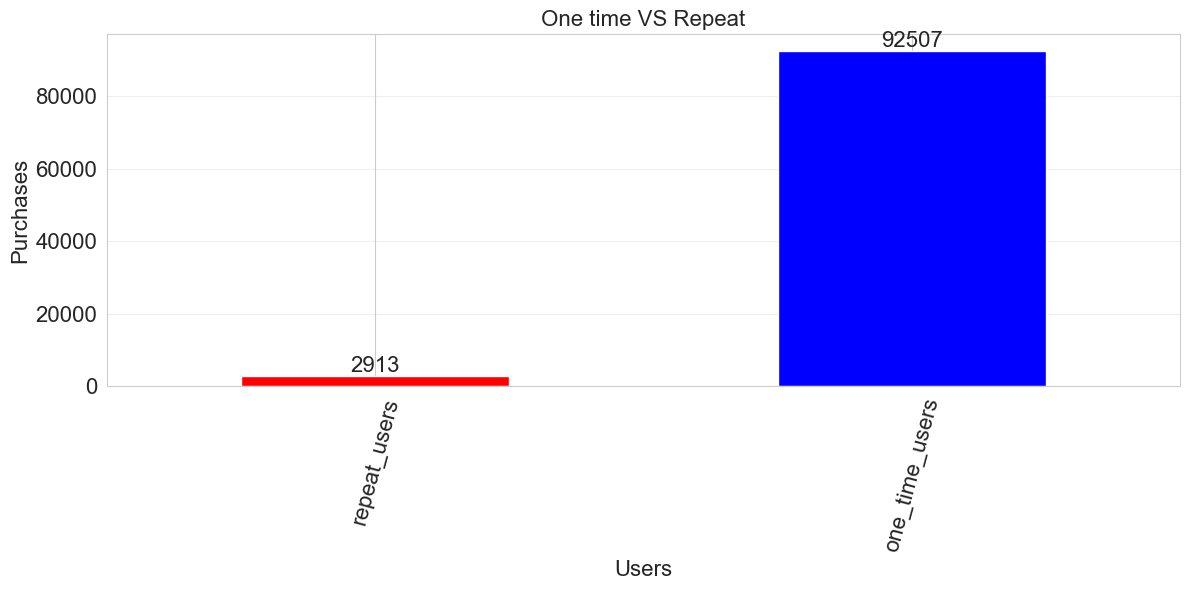

In [41]:
colors = ['red', 'blue']

ax = repeat_new_time_df["size_users_by_time"].plot(
    kind = 'bar',
    figsize = (12,6),
    fontsize = 16,
    color = colors
)

for p in ax.patches:
    ax.annotate(
        text=str(int(p.get_height())),
        xy=(p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', 
        va='bottom',
        fontsize = 16
    )
plt.grid(axis='y', alpha=0.3)
plt.title("One time VS Repeat", fontsize = 16)
plt.xlabel("Users", fontsize = 16)
plt.ylabel("Purchases", fontsize = 16)
plt.xticks(rotation = 75)
plt.tight_layout()
plt.show()

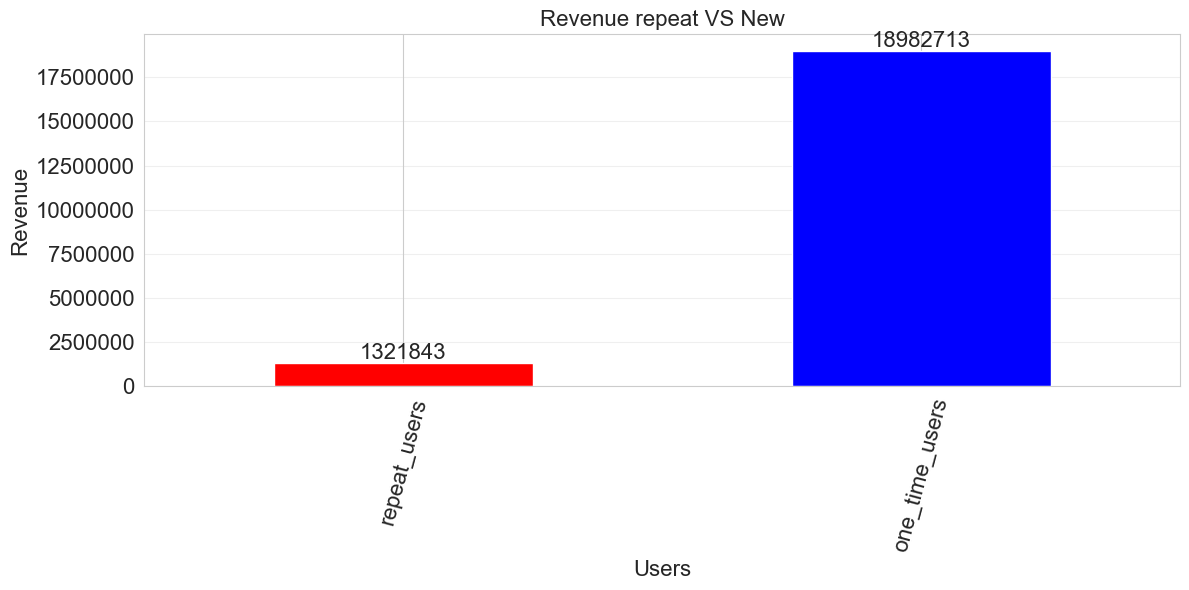

In [42]:
colors = ['red', 'blue']

ax = repeat_new_time_df["revenue_by_type_users"].plot(
    kind = 'bar',
    figsize = (12,6),
    fontsize = 16,
    color = colors
)

for p in ax.patches:
    ax.annotate(
        text=str(int(p.get_height())),
        xy=(p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', 
        va='bottom',
        fontsize = 16
    )

plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{int(x)}')
)
plt.grid(axis='y', alpha=0.3)
plt.title("Revenue repeat VS New", fontsize = 16)
plt.xlabel("Users", fontsize = 16)
plt.ylabel("Revenue", fontsize = 16)
plt.xticks(rotation = 75)
plt.tight_layout()
plt.show()

In [43]:
first_order = df.groupby('customer_id').agg(first_order_by_user = ('order_purchase_timestamp', 'min'))

In [44]:
first_order["first_order_by_user"] = first_order["first_order_by_user"].dt.date

In [45]:
orders = df[["order_id", "customer_id", "product_category_name", "freight_value", "total_price", "revenue", "order_purchase_timestamp"]].merge(first_order, how = 'inner', left_on = 'customer_id', right_index = True)

In [46]:
orders.head()

,order_id,customer_id,product_category_name,freight_value,total_price,revenue,order_purchase_timestamp,first_order_by_user
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,utilidades_domesticas,8.72,29.99,38.71,2017-10-02 10:56:33,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,perfumaria,22.76,118.70,141.46,2018-07-24 20:41:37,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,automotivo,19.22,159.90,179.12,2018-08-08 08:38:49,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,pet_shop,27.20,45.00,72.20,2017-11-18 19:28:06,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,papelaria,8.72,19.90,28.62,2018-02-13 21:18:39,2018-02-13


In [47]:
orders.groupby("first_order_by_user")["revenue"].agg(['sum', 'count'])

,sum,count
first_order_by_user,,
2016-09-04,272.46,2
2016-09-05,75.06,1
2016-09-15,430.38,3
2016-10-02,109.34,1
2016-10-03,595.14,8
...,...,...
2018-08-26,10531.69,82
2018-08-27,6720.81,71
2018-08-28,5012.66,45


In [48]:
orders.groupby(['first_order_by_user', 'order_purchase_timestamp'])["revenue"].agg(['sum' , 'count'])

sum  count
first_order_by_user order_purchase_timestamp                
2016-09-04          2016-09-04 21:15:19        272.46      2
2016-09-05          2016-09-05 00:15:34         75.06      1
2016-09-15          2016-09-15 12:16:38        430.38      3
2016-10-02          2016-10-02 22:07:52        109.34      1
2016-10-03          2016-10-03 09:44:50         45.46      1
...                                               ...    ...
2018-08-29          2018-08-29 14:18:23       1021.92      2
                    2018-08-29 14:18:28         61.29      1
                    2018-08-29 14:52:00         33.23      1
                    2018-08-29 15:00:37         93.75      1
2018-09-03          2018-09-03 09:06:57        166.46      1

[98112 rows x 2 columns]

In [49]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])

In [50]:
orders.dtypes

order_id                            object
customer_id                         object
product_category_name               object
freight_value                      float64
total_price                        float64
revenue                            float64
order_purchase_timestamp    datetime64[ns]
first_order_by_user                 object
dtype: object

In [51]:
orders["order_month"] = orders["order_purchase_timestamp"].dt.to_period('M')

In [52]:
orders.dtypes

order_id                            object
customer_id                         object
product_category_name               object
freight_value                      float64
total_price                        float64
revenue                            float64
order_purchase_timestamp    datetime64[ns]
first_order_by_user                 object
order_month                      period[M]
dtype: object

In [53]:
orders.groupby("customer_id")["order_month"].nunique()

customer_id
00012a2ce6f8dcda20d059ce98491703    1
000161a058600d5901f007fab4c27140    1
0001fd6190edaaf884bcaf3d49edf079    1
0002414f95344307404f0ace7a26f1d5    1
000379cdec625522490c315e70c7a9fb    1
                                   ..
fffcb937e9dd47a13f05ecb8290f4d3e    1
fffecc9f79fd8c764f843e9951b11341    1
fffeda5b6d849fbd39689bb92087f431    1
ffff42319e9b2d713724ae527742af25    1
ffffa3172527f765de70084a7e53aae8    1
Name: order_month, Length: 98666, dtype: int64

Исходя из имеющихся данных, большинство клиентов совершили только один заказ в месяц своей первой покупки. Поскольку повторных покупок в последующие месяцы практически нет, проведение когортного анализа нецелесообразно

In [54]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'total_items', 'total_price', 'total_freight', 'total_payment',
       'num_payments', 'review_score', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_id', 'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'revenue', 'order_month'],
      dtype='object')

In [55]:
top_categories = df.groupby("product_category_name_english").agg(
    total_revenue = ('revenue', 'sum'),
    total_orders = ("order_id", "nunique"),
    avg_order_value = ("revenue", "mean"),
    avg_review = ("review_score", "mean")
).sort_values('total_revenue', ascending = False).reset_index().head(10)
top_categories["revenue_share_pct"] = (top_categories["total_revenue"] / df["revenue"].sum()) * 100

In [56]:
top_categories.columns

Index(['product_category_name_english', 'total_revenue', 'total_orders',
       'avg_order_value', 'avg_review', 'revenue_share_pct'],
      dtype='object')

In [57]:
top_categories

,product_category_name_english,total_revenue,total_orders,avg_order_value,avg_review,revenue_share_pct
0,bed_bath_table,1711541.72,9417,153.984860,3.902733,8.429348
1,health_beauty,1657769.17,8836,171.434247,4.141451,8.164518
2,computers_accessories,1585208.17,6689,202.530749,3.937524,7.807155
3,furniture_decor,1429656.03,6449,171.545000,3.913113,7.041060
4,watches_gifts,1428999.10,5624,238.524303,4.018877,7.037824
5,sports_leisure,1392027.08,7720,161.095600,4.109652,6.855737
6,housewares,1094669.48,5884,157.189759,4.057425,5.391250
7,auto,852278.19,3897,201.246326,4.066236,4.197472
8,garden_tools,838185.91,3518,192.819395,4.044114,4.128068
9,cool_stuff,779523.50,3632,205.353925,4.148976,3.839155


C:\Users\SWAG\AppData\Local\Temp\ipykernel_27176\4005864290.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


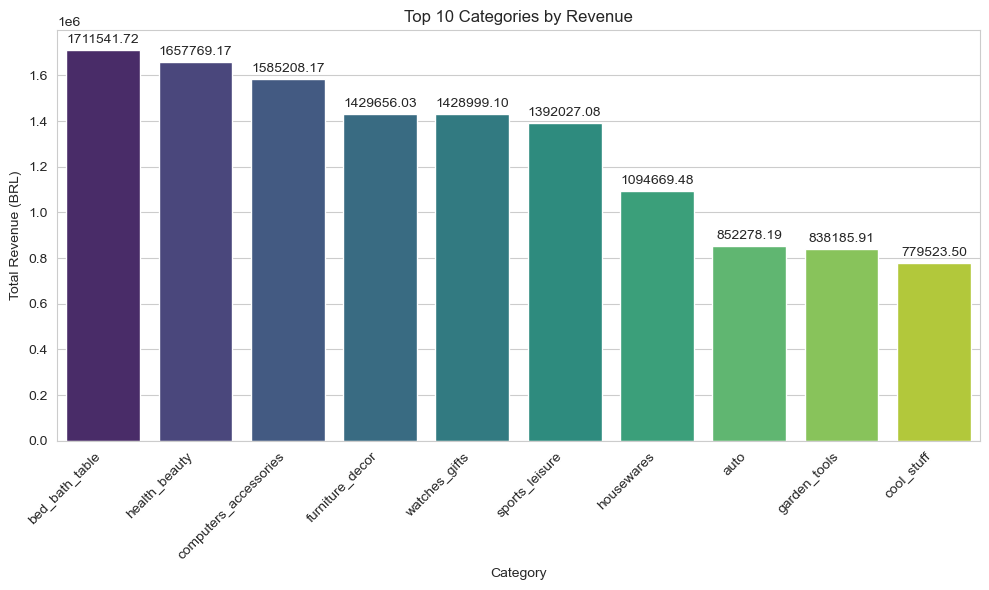

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=top_categories["product_category_name_english"], 
    y=top_categories["total_revenue"],  
    palette='viridis'
)


for container in ax.containers:
    ax.bar_label(container, fontsize=10, fmt='%.2f', padding=3)

plt.title("Top 10 Categories by Revenue")
plt.xlabel("Category")  
plt.ylabel("Total Revenue (BRL)")  
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

In [70]:
top_categories['share'] = (top_categories['total_revenue'] / df['revenue'].sum()) * 100
top_categories['orders'] = df.groupby('product_category_name_english')['order_id'].nunique().reindex(top_categories['product_category_name_english']).values
top_categories['avg_check'] = top_categories['total_revenue'] / top_categories['orders']
top_categories['avg_review'] = df.groupby('product_category_name_english')['review_score'].mean().reindex(top_categories['product_category_name_english']).values


In [71]:
top_categories

,product_category_name_english,total_revenue,total_orders,avg_order_value,avg_review,revenue_share_pct,share,orders,avg_check
0,bed_bath_table,1711541.72,9417,153.984860,3.902733,8.429348,8.429348,9417,181.750209
1,health_beauty,1657769.17,8836,171.434247,4.141451,8.164518,8.164518,8836,187.615343
2,computers_accessories,1585208.17,6689,202.530749,3.937524,7.807155,7.807155,6689,236.987318
3,furniture_decor,1429656.03,6449,171.545000,3.913113,7.041060,7.041060,6449,221.686468
4,watches_gifts,1428999.10,5624,238.524303,4.018877,7.037824,7.037824,5624,254.089456
5,sports_leisure,1392027.08,7720,161.095600,4.109652,6.855737,6.855737,7720,180.314389
6,housewares,1094669.48,5884,157.189759,4.057425,5.391250,5.391250,5884,186.041720
7,auto,852278.19,3897,201.246326,4.066236,4.197472,4.197472,3897,218.701101
8,garden_tools,838185.91,3518,192.819395,4.044114,4.128068,4.128068,3518,238.256370
9,cool_stuff,779523.50,3632,205.353925,4.148976,3.839155,3.839155,3632,214.626514


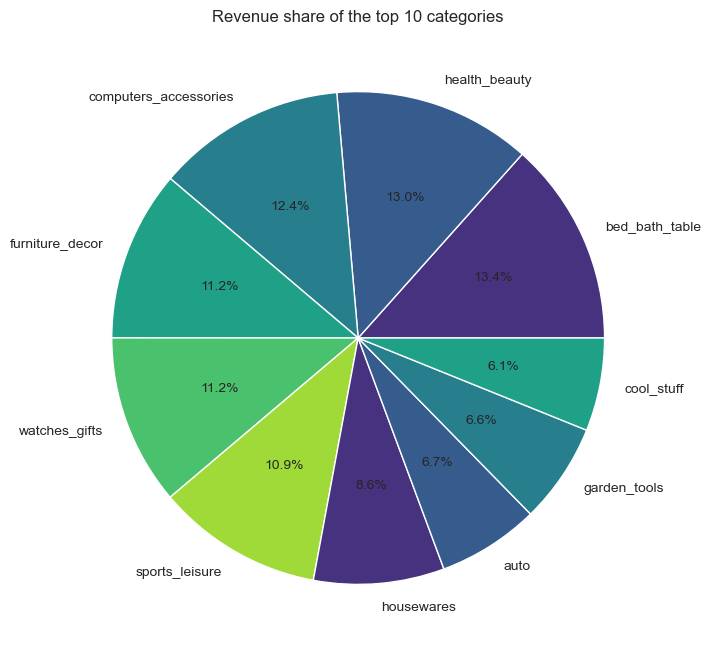

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
plt.pie(
    top_categories['share'], 
    labels=top_categories['product_category_name_english'], 
    autopct='%.1f%%',  
    colors=sns.color_palette('viridis')
)
plt.title('Revenue share of the top 10 categories')
plt.show()

## Топ-категории <a id="top-cat"></a>
Топ-5 среди топ-10: bed_bath_table (13.4% от топ-10 revenue), health_beauty (13.0%), computers_accessories (12.4%). Средний чек 212 BRL — высокая ценность (из расчёта avg_check).

In [59]:
from datetime import datetime
rfm = df.groupby('customer_unique_id').agg(
    Recency=('order_purchase_timestamp', lambda x: (df['order_purchase_timestamp'].max() - x.max()).days),
    Frequency=('order_id', 'nunique'),
    Monetary=('revenue', 'sum')
)
rfm['R'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])
rfm['RFM'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
print(rfm.groupby('RFM').size().sort_values(ascending=False).head(10))

RFM
444    1783
344    1717
244    1676
232    1632
343    1613
122    1605
121    1600
423    1589
144    1579
421    1570
dtype: int64


In [60]:
from datetime import datetime
rfm = df.groupby('customer_unique_id').agg(
    Recency=('order_purchase_timestamp', lambda x: (df['order_purchase_timestamp'].max() - x.max()).days),
    Frequency = ('order_id', 'nunique'),
    Monetary=('revenue', 'sum')
)
rfm['R'] = pd.qcut(rfm['Recency'], 4, labels = [4,3,2,1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method = 'first'), 4, labels = [1,2,3,4])
rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels = [1,2,3,4])
rfm['RFM'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
print(rfm.groupby('RFM').size().sort_values(ascending = False).head())

RFM
444    1783
344    1717
244    1676
232    1632
343    1613
dtype: int64


In [61]:
rfm_agg = rfm.groupby("RFM").agg(
    monetary_sum = ("Monetary", "sum"),
    monetary_avg = ("Monetary", "mean"),
    frequency_avg = ("Frequency", "mean"),
    recency_avg = ("Recency", "mean")
).sort_values("monetary_sum", ascending=False)

In [62]:
rfm_agg

,monetary_sum,monetary_avg,frequency_avg,recency_avg
RFM,,,,
444,1074690.17,602.742664,1.361750,62.881099
344,1066053.90,620.881712,1.329645,170.338381
214,958298.64,672.018682,1.000000,283.066620
244,952616.47,568.386915,1.282220,283.529236
144,859225.57,544.158056,1.229259,459.087397
...,...,...,...,...
411,63519.28,43.506356,1.000000,60.563699
141,60603.90,43.788945,1.014451,458.316474
341,60369.75,44.194546,1.010249,173.145681


In [63]:
top_monetary = rfm_agg.head(10)

In [64]:
top_monetary

,monetary_sum,monetary_avg,frequency_avg,recency_avg
RFM,,,,
444,1074690.17,602.742664,1.361750,62.881099
344,1066053.90,620.881712,1.329645,170.338381
214,958298.64,672.018682,1.000000,283.066620
244,952616.47,568.386915,1.282220,283.529236
144,859225.57,544.158056,1.229259,459.087397
434,845291.39,591.940749,1.000000,64.191176
114,812084.88,560.832099,1.000000,459.114641
124,809773.06,576.350932,1.000000,454.962278
424,801608.53,572.986798,1.000000,62.521801


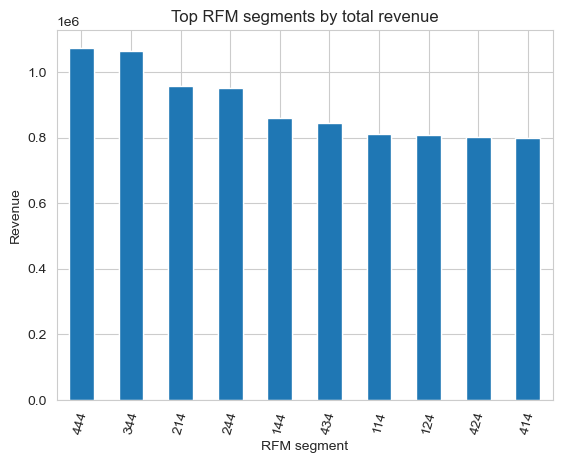

In [65]:
top_monetary["monetary_sum"].plot(kind="bar")

top_monetary["monetary_sum"].plot(kind = "bar")
plt.title("Top RFM segments by total revenue")
plt.ylabel("Revenue")
plt.xlabel("RFM segment")
plt.xticks(rotation = 75)
plt.show()

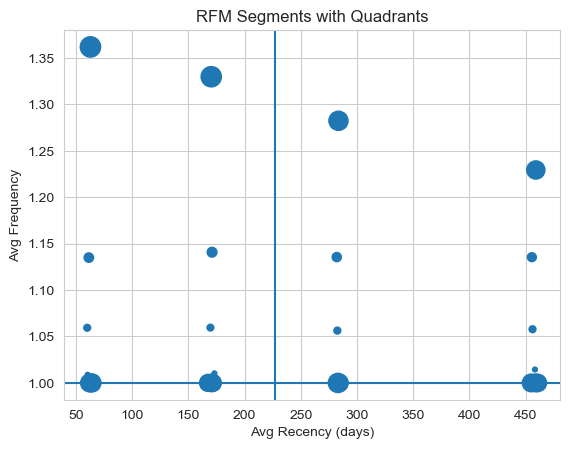

In [66]:
recency_median = rfm_agg["recency_avg"].median()
frequency_median = rfm_agg["frequency_avg"].median()

plt.scatter(
    rfm_agg["recency_avg"],
    rfm_agg["frequency_avg"],
    s=rfm_agg["monetary_sum"] / 5000
)

plt.axvline(recency_median)
plt.axhline(frequency_median)

plt.xlabel("Avg Recency (days)")
plt.ylabel("Avg Frequency")
plt.title("RFM Segments with Quadrants")
plt.show()


In [67]:
mediana_po_recency = rfm_agg["recency_avg"].median()
mediana_po_frequency = rfm_agg["frequency_avg"].median()

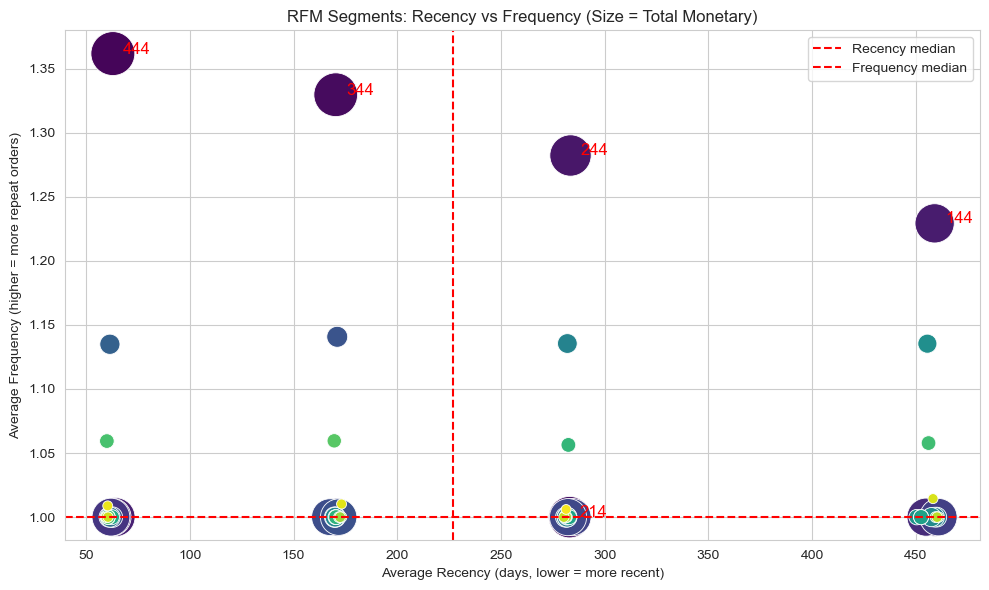

In [68]:
import matplotlib.pyplot as plt 
import seaborn as sns 

recency_median = rfm_agg["recency_avg"].median()
frequency_median = rfm_agg["frequency_avg"].median()

plt.figure(figsize = (10, 6))
sns.scatterplot(
    data = rfm_agg, 
    x = "recency_avg",
    y = "frequency_avg",
    size = "monetary_sum",
    sizes = (50, 1000),
    hue = "RFM", 
    palette = "viridis",
    legend = False
)

plt.axvline(recency_median, color = 'red', linestyle = '--', label = 'Recency median')
plt.axhline(frequency_median, color = 'red', linestyle = '--', label = 'Frequency median')

for i in rfm_agg.nlargest(5, 'monetary_sum').index:
    plt.text(
        rfm_agg.loc[i, 'recency_avg'] + 5, 
        rfm_agg.loc[i, 'frequency_avg'],
        i,
        fontsize = 12,
        color = 'red'
    )
plt.title("RFM Segments: Recency vs Frequency (Size = Total Monetary)")
plt.xlabel("Average Recency (days, lower = more recent)")
plt.ylabel("Average Frequency (higher = more repeat orders)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Cohort-анализ <a id="cohort"></a>

Была предпринята попытка провести когортный анализ по месяцу первой покупки клиента.
Однако данные показали отсутствие значимых повторных заказов в последующие месяцы, в связи с чем когортный анализ не даёт дополнительной аналитической ценности.


In [84]:
df['first_order_month'] = df.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')


In [85]:
cohort = df.groupby(['first_order_month', 'order_month'])['customer_unique_id'].nunique().reset_index()
cohort['cohort_month'] = (cohort['order_month'] - cohort['first_order_month']).apply(lambda x: x.n)  # Месяцы от первой покупки

In [86]:
cohort_pivot = cohort.pivot(index='first_order_month', columns='cohort_month', values='customer_unique_id')
retention = cohort_pivot.div(cohort_pivot[0], axis=0)  # % удержания


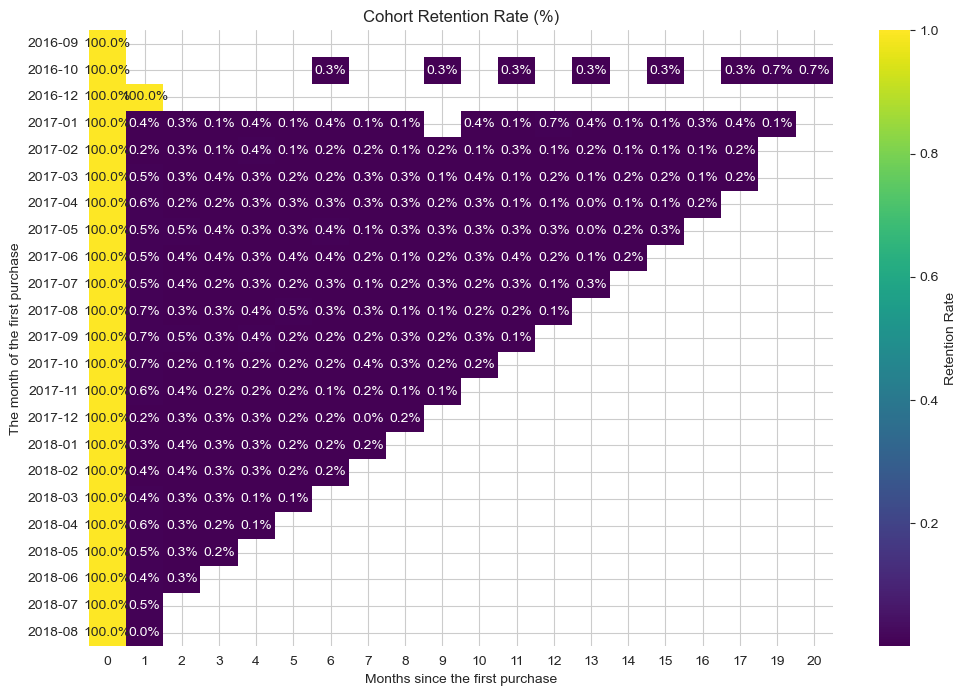

In [87]:
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt='.1%', cmap='viridis', cbar_kws={'label': 'Retention Rate'})
plt.title('Cohort Retention Rate (%)')
plt.xlabel('Months since the first purchase')
plt.ylabel('The month of the first purchase')
plt.show()

In [89]:

print('Average retention for 2 months: {:.1%}'.format(retention[1].mean()))

Average retention for 2 months: 5.2%


Retention low: ~2–5% на 3 месяц. Клиенты из 2017 быстро уходят — нужно улучшать.

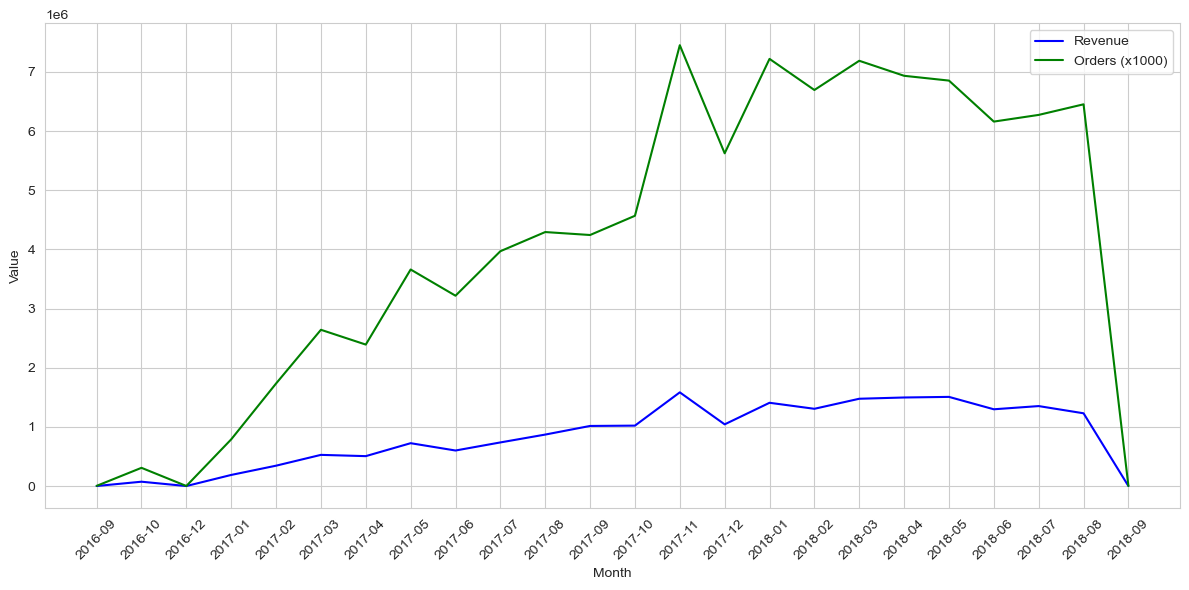

In [82]:
monthly_revenue = df.groupby('order_month')['revenue'].sum()
monthly_orders = df.groupby('order_month')['order_id'].nunique()

monthly_revenue.index = monthly_revenue.index.astype(str)
monthly_orders.index = monthly_orders.index.astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, label='Revenue', color='blue')
sns.lineplot(x=monthly_orders.index, y=monthly_orders.values * 1000, label='Orders (x1000)', color='green')  
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

Рост в 2018 (+20% YoY), пики в ноябре — сезонность для планирования.

## Рекомендации <a id="recs"></a>
### По увеличению выручки
- Сфокусировать инвестиции на топ-категориях (например, health_beauty с высокой долей положительных отзывов и ~8% выручки), используя бандлы и cross-sell как потенциальный драйвер роста среднего чека.
- Рассмотреть промо-механику бесплатной доставки для заказов свыше 200 BRL с целью увеличения среднего чека.
## По удержанию клиентов
- Разработать программы лояльности и email-кампании для клиентов с высоким RFM-сегментом (например, RFM 444 — 1783 клиента).
- Реактивировать клиентов с высоким риском оттока с помощью напоминаний и персональных скидок.
- Использовать персонализированные рекомендации в категориях с более высокой долей повторных покупок (например, furniture).